# Data Preprocessing


##### Downloading dataset


In [268]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

In [269]:
od.download(
    'https://www.kaggle.com/datasets/shariful07/student-mental-health/data')

Skipping, found downloaded files in ".\student-mental-health" (use force=True to force download)


In [270]:
dataset = pd.read_csv("student-mental-health\\Student Mental health.csv")
dataset.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [271]:
dataset = dataset.drop("Timestamp", axis=1)
dataset = dataset.drop("Did you seek any specialist for a treatment?", axis=1)

In [272]:
# Renaming columns
dataset.rename(columns={'Choose your gender': 'Gender', 'What is your course?': 'Course', 'Your current year of Study': 'Study Year', 'What is your CGPA?': 'CGPA', 'Marital status': 'Marital Status',
               'Do you have Depression?': 'Depression', 'What is your course?': 'Course', 'Do you have Anxiety?': 'Anxiety', 'Do you have Panic attack?': 'Panic Attack'}, inplace=True)

In [273]:
# Sample DataFrame
data = pd.read_csv("Processed Data.csv")
dataset["Course"] = data['Course']
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack
0,Female,18.0,5,year 1,3.00 - 3.49,No,Yes,No,Yes
1,Male,21.0,10,year 2,3.00 - 3.49,No,No,Yes,No
2,Male,19.0,4,Year 1,3.00 - 3.49,No,Yes,Yes,Yes
3,Female,22.0,8,year 3,3.00 - 3.49,Yes,Yes,No,No
4,Male,23.0,9,year 4,3.00 - 3.49,No,No,No,No


In [274]:
mapping = {
    0: 'Agriculture and Environmental Studies',
    1: 'Arts and Humanities',
    2: 'Business and Economics',
    3: 'Communication and Media',
    4: 'Computer and Information Sciences',
    5: 'Engineering and Technology',
    6: 'Health Sciences',
    7: 'Interdisciplinary Studies',
    8: 'Law',
    9: 'Mathematics and Statistics',
    10: 'Religious Studies',
    11: 'Social Sciences'
}

# Replace integers with corresponding strings
dataset['Course'] = data['Course'].map(mapping)


In [275]:
# Processing age column
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)
# Round the mean value to the nearest integer (optional)
mean_age = round(mean_age)
# Convert the 'Age' column to integers
dataset['Age'] = dataset['Age'].astype(int)

# Filling empty cells with value "Female"
dataset['Gender'].fillna('Female', inplace=True)

# Convert 'Study Year' and 'CGPA' to lowercase and strip leading and trailing spaces
dataset['Study Year'] = dataset['Study Year'].str.lower().str.strip().str.replace(" ", "")
dataset['CGPA'] = dataset['CGPA'].str.lower().str.strip().str.replace(" ", "")


In [276]:
dataset.head()

,Gender,Age,Course,Study Year,CGPA,Marital Status,Depression,Anxiety,Panic Attack
0,Female,18,Engineering and Technology,year1,3.00-3.49,No,Yes,No,Yes
1,Male,21,Religious Studies,year2,3.00-3.49,No,No,Yes,No
2,Male,19,Computer and Information Sciences,year1,3.00-3.49,No,Yes,Yes,Yes
3,Female,22,Law,year3,3.00-3.49,Yes,Yes,No,No
4,Male,23,Mathematics and Statistics,year4,3.00-3.49,No,No,No,No


In [277]:
import plotly.express as px

# Calculate value counts
value_counts = dataset['Age'].value_counts()
value_counts2 = dataset['Study Year'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(names=value_counts.index, values=value_counts.values,
             title='Pie Chart based on age count')
fig2 = px.pie(names=value_counts2.index, values=value_counts2.values,
              title='Pie Chart based on study year count')

# Show the plot
fig.show()
fig2.show()

In [278]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

#dataset.sort_values(by="CGPA", inplace=True)
plt.figure(dpi=200)
fig = px.bar(dataset, x="Age", y="Course",
             orientation='h', color='CGPA')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [279]:
# dataset.sort_values(by="Study Year", inplace=True)

x = dataset["Age"]

fig = go.Figure()

# Create and style traces

fig.add_trace(go.Scatter(x=x, y=dataset["Depression"], name='Depression', line=dict(
    color='firebrick', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Panic Attack"], name='Panic Attack', line=dict(
    color='royalblue', width=4, dash='dashdot')))

fig.add_trace(go.Scatter(x=x, y=dataset["Anxiety"], name='Anxiety', line=dict(
    color='black', width=4, dash='dashdot')))


# Edit the layout

fig.update_layout(title='Depressive symptoms across ages',
                  xaxis_title='Age Groups', yaxis_title='Types of issue')


fig.show()

In [280]:
x = dataset["Age"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=dataset["Depression"],
                         name='Depression',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='Depression across ages',
                   xaxis_title='Age',
                   yaxis_title='Depression')


fig.show()

- **Key Finding:** The analysis reveals a higher prevalence of depression among students pursuing computer-related degrees compared to other disciplines.

- **Age Group Impact:** Students in the midst of their degree, specifically at the age of 19-20, exhibit a higher likelihood of experiencing depression compared to other age groups.

- **Discipline Comparison:**

  - _Computer-related Degrees:_ Highest reported depression rates.
  - _Engineering and Technology Degrees:_ Second-highest depression rates.

- **Temporal Patterns in Engineering and Technology Courses:**
  - _Start of Degrees:_ Engineering and technology students show an increased likelihood of depression at the beginning of their academic journey.
  - _End of Degrees:_ Similarly, a notable prevalence of depression is observed towards the completion of their degrees.


# Getting Data ready for deep learning

In [281]:

X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

In [282]:
print(X)

[['Female' 18 'Engineering and Technology' 'year1' '3.00-3.49' 'No' 'Yes']
 ['Male' 21 'Religious Studies' 'year2' '3.00-3.49' 'No' 'No']
 ['Male' 19 'Computer and Information Sciences' 'year1' '3.00-3.49' 'No'
  'Yes']
 ['Female' 22 'Law' 'year3' '3.00-3.49' 'Yes' 'Yes']
 ['Male' 23 'Mathematics and Statistics' 'year4' '3.00-3.49' 'No' 'No']
 ['Male' 19 'Engineering and Technology' 'year2' '3.50-4.00' 'No' 'No']
 ['Female' 23 'Religious Studies' 'year2' '3.50-4.00' 'Yes' 'Yes']
 ['Female' 18 'Computer and Information Sciences' 'year1' '3.50-4.00'
  'No' 'No']
 ['Female' 19 'Business and Economics' 'year2' '2.50-2.99' 'No' 'No']
 ['Male' 18 'Interdisciplinary Studies' 'year1' '3.50-4.00' 'No' 'No']
 ['Female' 20 'Social Sciences' 'year1' '3.50-4.00' 'No' 'No']
 ['Female' 24 'Engineering and Technology' 'year3' '3.50-4.00' 'Yes'
  'Yes']
 ['Female' 18 'Computer and Information Sciences' 'year1' '3.00-3.49'
  'No' 'Yes']
 ['Male' 19 'Engineering and Technology' 'year1' '3.00-3.49' 'No' '

In [283]:
print(y)

['No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No']


In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
Female: 0
Male: 1


In [285]:
print(X)

[[0 18 'Engineering and Technology' 'year1' '3.00-3.49' 'No' 'Yes']
 [1 21 'Religious Studies' 'year2' '3.00-3.49' 'No' 'No']
 [1 19 'Computer and Information Sciences' 'year1' '3.00-3.49' 'No' 'Yes']
 [0 22 'Law' 'year3' '3.00-3.49' 'Yes' 'Yes']
 [1 23 'Mathematics and Statistics' 'year4' '3.00-3.49' 'No' 'No']
 [1 19 'Engineering and Technology' 'year2' '3.50-4.00' 'No' 'No']
 [0 23 'Religious Studies' 'year2' '3.50-4.00' 'Yes' 'Yes']
 [0 18 'Computer and Information Sciences' 'year1' '3.50-4.00' 'No' 'No']
 [0 19 'Business and Economics' 'year2' '2.50-2.99' 'No' 'No']
 [1 18 'Interdisciplinary Studies' 'year1' '3.50-4.00' 'No' 'No']
 [0 20 'Social Sciences' 'year1' '3.50-4.00' 'No' 'No']
 [0 24 'Engineering and Technology' 'year3' '3.50-4.00' 'Yes' 'Yes']
 [0 18 'Computer and Information Sciences' 'year1' '3.00-3.49' 'No' 'Yes']
 [1 19 'Engineering and Technology' 'year1' '3.00-3.49' 'No' 'No']
 [0 18 'Engineering and Technology' 'year2' '3.50-4.00' 'No' 'No']
 [1 24 'Computer and I

In [286]:
unique_strings = np.unique(X[:, 2]).tolist()

print(unique_strings)

['Agriculture and Environmental Studies', 'Arts and Humanities', 'Business and Economics', 'Communication and Media', 'Computer and Information Sciences', 'Engineering and Technology', 'Health Sciences', 'Interdisciplinary Studies', 'Law', 'Mathematics and Statistics', 'Religious Studies', 'Social Sciences']


| Category                              | One-Hot Encoding                           |
|---------------------------------------|--------------------------------------------|
| Agriculture and Environmental Studies | [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Arts and Humanities                   | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Business and Economics                | [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Communication and Media              | [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]      |
| Computer and Information Sciences     | [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      |
| Engineering and Technology            | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]      |
| Health Sciences                       | [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]      |
| Interdisciplinary Studies             | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]      |
| Law                                   | [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]      |
| Mathematics and Statistics            | [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]      |
| Religious Studies                     | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]      |
| Social Sciences                       | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]      |


In [287]:
#Applying One Hot encoding on Course Column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [288]:
np.set_printoptions(threshold=np.inf)
print(X)

[[0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18 'year1'
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1 21 'year2'
  '3.00-3.49' 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19 'year1'
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0 22 'year3'
  '3.00-3.49' 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1 23 'year4'
  '3.00-3.49' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19 'year2'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0 23 'year2'
  '3.50-4.00' 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 19 'year2'
  '2.50-2.99' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 18 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0 20 'year1'
  '3.50-4.00' 'No' 'No']
 [0.0 0.0 0.0 0.0 0.0 1.0 

In [289]:
unique_strings = np.unique(X[:, 14]).tolist()

print(unique_strings)

['year1', 'year2', 'year3', 'year4']


| Year   | One-Hot Encoding                  |
|--------|-----------------------------------|
| year1  | [1, 0, 0, 0]                      |
| year2  | [0, 1, 0, 0]                      |
| year3  | [0, 0, 1, 0]                      |
| year4  | [0, 0, 0, 1]                      |


In [290]:
#Applying One Hot encoding on Course Column

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [14])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [291]:
print(X)

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18
  '3.00-3.49' 'No' 'Yes']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1 21
  '3.00-3.49' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19
  '3.00-3.49' 'No' 'Yes']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0 22
  '3.00-3.49' 'Yes' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1 23
  '3.00-3.49' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1 19
  '3.50-4.00' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0 23
  '3.50-4.00' 'Yes' 'Yes']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 18
  '3.50-4.00' 'No' 'No']
 [0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 19
  '2.50-2.99' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 18
  '3.50-4.00' 'No' 'No']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [292]:
unique_strings = np.unique(X[:, -3]).tolist()

print(unique_strings)

['0-1.99', '2.00-2.49', '2.50-2.99', '3.00-3.49', '3.50-4.00']


In [293]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

| Grade Range | One-Hot Encoding                  |
|-------------|-----------------------------------|
| 0-1.99      | [1, 0, 0, 0, 0]                  |
| 2.00-2.49   | [0, 1, 0, 0, 0]                  |
| 2.50-2.99   | [0, 0, 1, 0, 0]                  |
| 3.00-3.49   | [0, 0, 0, 1, 0]                  |
| 3.50-4.00   | [0, 0, 0, 0, 1]                  |


In [294]:
print(X)

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 'No' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 1 21 'No' 'No']
 [0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 'No' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0 22 'Yes' 'Yes']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 1 23 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0 23 'Yes' 'Yes']
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 'No' 'No']
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 19 'No' 'No']
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [295]:
# Label encoding for martial status 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -2] = le.fit_transform(X[:, -2])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [296]:
# Label encoding for depression

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:, -1])

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


In [297]:
print(X)

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 1 21 0 0]
 [0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0 22 1 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 1 23 0 0]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 1 19 0 0]
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0 23 1 1]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 18 0 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0 19 0 0]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 0.0 0.0 1 18 0 0]
 [0.0 0.0 0.0 0.0 1.

In [298]:
# Label encoding for Anxiety

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("Mapping of original strings to numerical labels:")
for original, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {label}")

Mapping of original strings to numerical labels:
No: 0
Yes: 1


### Splitting the dataset into the Training set and Test set

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

### Feature Scaling

In [300]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [301]:
# Feature Extraction using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [302]:
# Feature Selection using LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = lasso.coef_ != 0
X_train_lasso = X_train[:, selected_features]
X_test_lasso = X_test[:, selected_features]

# Initializing ANN

In [303]:
import seaborn as sns
from keras import callbacks
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [304]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model_lasso = Sequential()

# layers

model_lasso.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim=X_train_lasso.shape[1]))
model_lasso.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model_lasso.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model_lasso.add(Dropout(0.25))
model_lasso.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_lasso.add(Dropout(0.5))
model_lasso.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model_lasso.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model_lasso.fit(X_train_lasso, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


2/2 [==============================] - 1s 363ms/step - loss: 0.6931 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.8667
Epoch 2/150
2/2 [==============================] - 0s 75ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6930 - val_accuracy: 0.8667
Epoch 3/150
2/2 [==============================] - 0s 85ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6930 - val_accuracy: 0.8667
Epoch 4/150
2/2 [==============================] - 0s 70ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6929 - val_accuracy: 0.8667
Epoch 5/150
2/2 [==============================] - 0s 73ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6928 - val_accuracy: 0.8667
Epoch 6/150
2/2 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6928 - val_accuracy: 0.8667
Epoch 7/150
2/2 [==============================] - 0s 71ms/step - loss: 0.6930 - accuracy: 0.6167 - val_loss: 0.6927 - val_accuracy: 0.8667
Epoch 8/150
2/2 [==============

In [305]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim=X_train_pca.shape[1]))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train_pca, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 1s 372ms/step - loss: 0.6931 - accuracy: 0.6333 - val_loss: 0.6931 - val_accuracy: 0.8667
Epoch 2/150
2/2 [==============================] - 0s 85ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6930 - val_accuracy: 0.8667
Epoch 3/150
2/2 [==============================] - 0s 77ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6929 - val_accuracy: 0.8667
Epoch 4/150
2/2 [==============================] - 0s 71ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6929 - val_accuracy: 0.8667
Epoch 5/150
2/2 [==============================] - 0s 72ms/step - loss: 0.6931 - accuracy: 0.6167 - val_loss: 0.6928 - val_accuracy: 0.8667
Epoch 6/150
2/2 [==============================] - 0s 71ms/step - loss: 0.6930 - accuracy: 0.6167 - val_loss: 0.6928 - val_accuracy: 0.8667
Epoch 7/150
2/2 [==============================] - 0s 70ms/step - loss: 0.6930 - accuracy: 0.6167 - val_loss: 0.6927 - val_accuracy: 0.8667
Epoch 8/150
2/2 [==

In [306]:
from sklearn.metrics import accuracy_score

# Evaluate model with PCA
y_pred_pca = np.argmax(model.predict(X_test_pca), axis=-1)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", accuracy_with_pca)

1/1 [==============================] - 0s 136ms/step
Accuracy with PCA: 0.6538461538461539


In [308]:

#from ann_visualizer.visualize import ann_viz;
#Build your model here
#ann_viz(model)

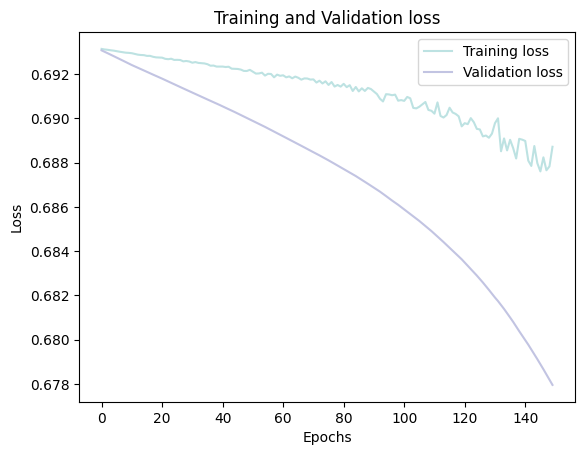

In [309]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

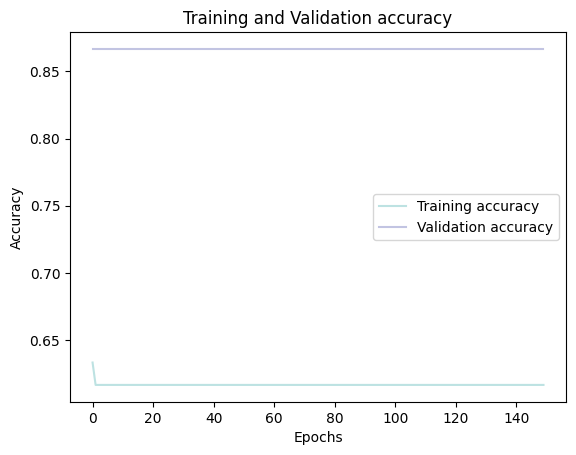

In [310]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 45ms/step


<Axes: >

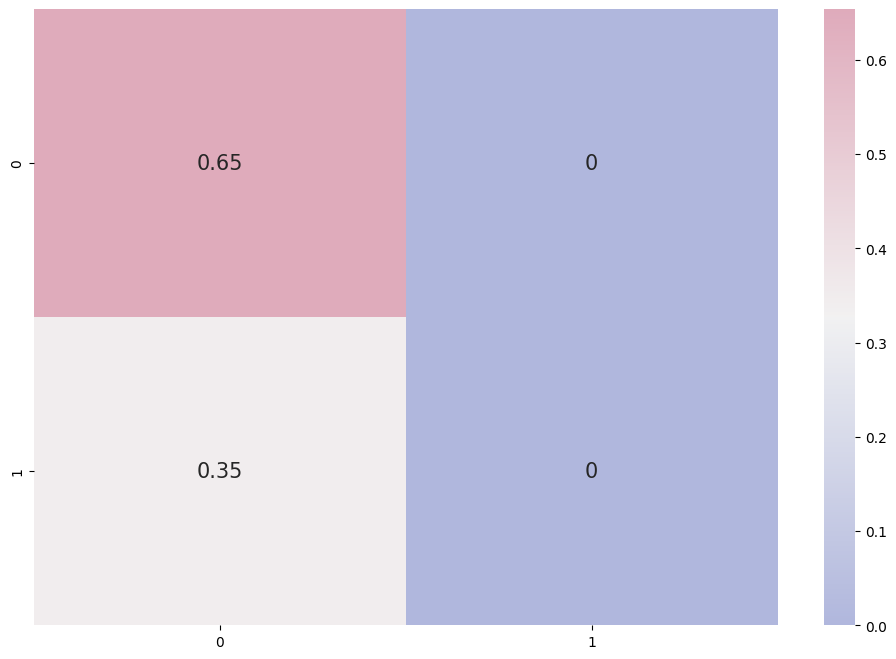

In [311]:
# confusion matrix

# Predicting the test set results
y_pred = model.predict(X_test_pca)
y_pred = (y_pred > 0.5)

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        17
           1       0.00      0.00      0.00         9

    accuracy                           0.65        26
   macro avg       0.33      0.50      0.40        26
weighted avg       0.43      0.65      0.52        26



c:\Users\saif_\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\saif_\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\saif_\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [317]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [314]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  7]
 [ 7  2]]


0.46153846153846156

In [315]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 55.54 %
Standard Deviation: 14.07 %
